<a href="https://colab.research.google.com/github/mousa-rashdan/a1/blob/main/mousa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset to inspect its contents
file_path = '/content/ALL_DATA.csv.xlsx'
data = pd.ExcelFile("/content/ALL_DATA.csv.xlsx")

# Display sheet names to understand the structure of the file
data.sheet_names


['fact_table']

In [ ]:
# Load the sheet and display the first few rows to understand the structure of the data
df = data.parse('fact_table')
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 35 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   payment_key                 1000000 non-null  object 
 1   coustomer_key               1000000 non-null  object 
 2   time_key                    1000000 non-null  object 
 3   item_key                    1000000 non-null  object 
 4   store_key                   1000000 non-null  object 
 5   quantity                    1000000 non-null  int64  
 6   unit                        996277 non-null   object 
 7   unit_price                  1000000 non-null  float64
 8   total_price                 1000000 non-null  float64
 9   customer_dim.coustomer_key  1000000 non-null  object 
 10  customer_dim.name           997010 non-null   object 
 11  customer_dim.contact_no     1000000 non-null  int64  
 12  customer_dim.nid            1000000 non-null  int64  
 13

(  payment_key coustomer_key time_key item_key store_key  quantity     unit  \
 0        P026       C004510  T049189   I00177    S00307         1       ct   
 1        P023       C004168   T00001   I00038    S00409         8  bottles   
 2        P007       C002764  T080589   I00177    S00674         1       ct   
 3        P019       C006587  T080589   I00037    S00181        11     cans   
 4        P022       C007866  T080589   I00036    S00717         2     cans   
 
    unit_price  total_price customer_dim.coustomer_key  ... store_dim.Column3  \
 0        35.0         35.0                    C004510  ...          JAMALPUR   
 1        23.0        184.0                    C004168  ...         BANDARBAN   
 2        35.0         35.0                    C002764  ...             DHAKA   
 3        16.0        176.0                    C006587  ...           JESSORE   
 4        16.0         32.0                    C007866  ...           BARISAL   
 
      store_dim.Column4  time_dim.ti

In [ ]:
# Reload the file but limit rows to speed up loading for inspection
df_sample = data.parse('fact_table', nrows=100)  # Load only the first 100 rows for now
df_sample.head(), df_sample.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   payment_key                 100 non-null    object 
 1   coustomer_key               100 non-null    object 
 2   time_key                    100 non-null    object 
 3   item_key                    100 non-null    object 
 4   store_key                   100 non-null    object 
 5   quantity                    100 non-null    int64  
 6   unit                        99 non-null     object 
 7   unit_price                  100 non-null    float64
 8   total_price                 100 non-null    float64
 9   customer_dim.coustomer_key  100 non-null    object 
 10  customer_dim.name           100 non-null    object 
 11  customer_dim.contact_no     100 non-null    int64  
 12  customer_dim.nid            100 non-null    int64  
 13  Trans_dim.Column1           100 non-

(  payment_key coustomer_key time_key item_key store_key  quantity     unit  \
 0        P026       C004510  T049189   I00177    S00307         1       ct   
 1        P023       C004168   T00001   I00038    S00409         8  bottles   
 2        P007       C002764  T080589   I00177    S00674         1       ct   
 3        P019       C006587  T080589   I00037    S00181        11     cans   
 4        P022       C007866  T080589   I00036    S00717         2     cans   
 
    unit_price  total_price customer_dim.coustomer_key  ... store_dim.Column3  \
 0        35.0         35.0                    C004510  ...          JAMALPUR   
 1        23.0        184.0                    C004168  ...         BANDARBAN   
 2        35.0         35.0                    C002764  ...             DHAKA   
 3        16.0        176.0                    C006587  ...           JESSORE   
 4        16.0         32.0                    C007866  ...           BARISAL   
 
      store_dim.Column4  time_dim.ti

In [ ]:
# الإحصائيات الأساسية للبيانات
basic_stats = df.describe()

# إضافة عدد القيم غير المفقودة
basic_stats.loc['non-null count'] = df.notnull().sum()

# ترتيب الصفوف لتكون أكثر وضوحًا
basic_stats = basic_stats.loc[['non-null count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# عرض البيانات بشكل منظم
print("Basic Statistics:\n")
print(basic_stats.round(2))


Basic Statistics:

                  quantity  unit_price  total_price  customer_dim.contact_no  \
non-null count  1000000.00  1000000.00   1000000.00             1.000000e+06   
mean                  6.00       17.56       105.40             8.801753e+12   
std                   3.16        8.64        80.83             1.440965e+08   
min                   1.00        6.00         6.00             8.801510e+12   
25%                   3.00       13.00        47.25             8.801631e+12   
50%                   6.00       16.00        90.00             8.801752e+12   
75%                   9.00       20.00       144.00             8.801877e+12   
max                  11.00       55.00       605.00             8.802000e+12   

                customer_dim.nid  item_dim.unit_price  time_dim.hour  \
non-null count      1.000000e+06           1000000.00     1000000.00   
mean                5.482455e+12                17.56          11.54   
std                 2.624283e+12            

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# تحويل عمود التاريخ (إذا كان موجودًا) إلى النوع datetime
if 'time_dim.date' in df.columns:
    df['time_dim.date'] = pd.to_datetime(df['time_dim.date'], errors='coerce')

<ipython-input-5-3053fff1e66c>:7: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['time_dim.date'] = pd.to_datetime(df['time_dim.date'], errors='coerce')


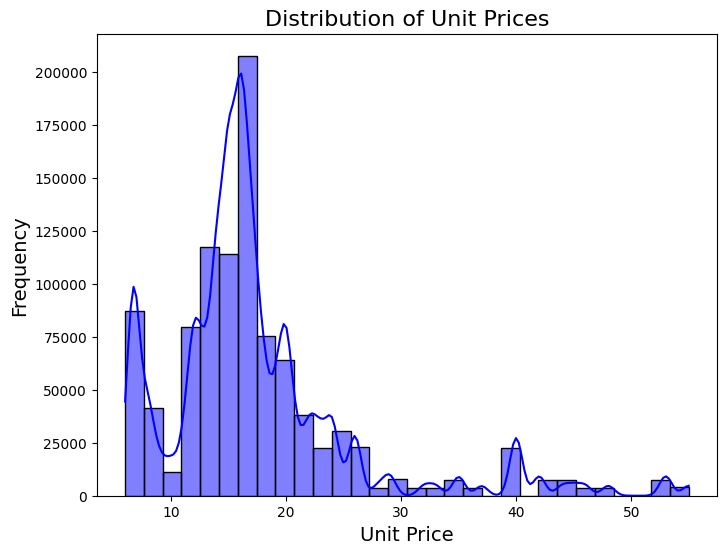

In [ ]:
# 1. Histogram: توزيع القيم في عمود رقمي
plt.figure(figsize=(8, 6))
sns.histplot(df['unit_price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Unit Prices', fontsize=16)
plt.xlabel('Unit Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()



<ipython-input-7-c296e0632481>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')


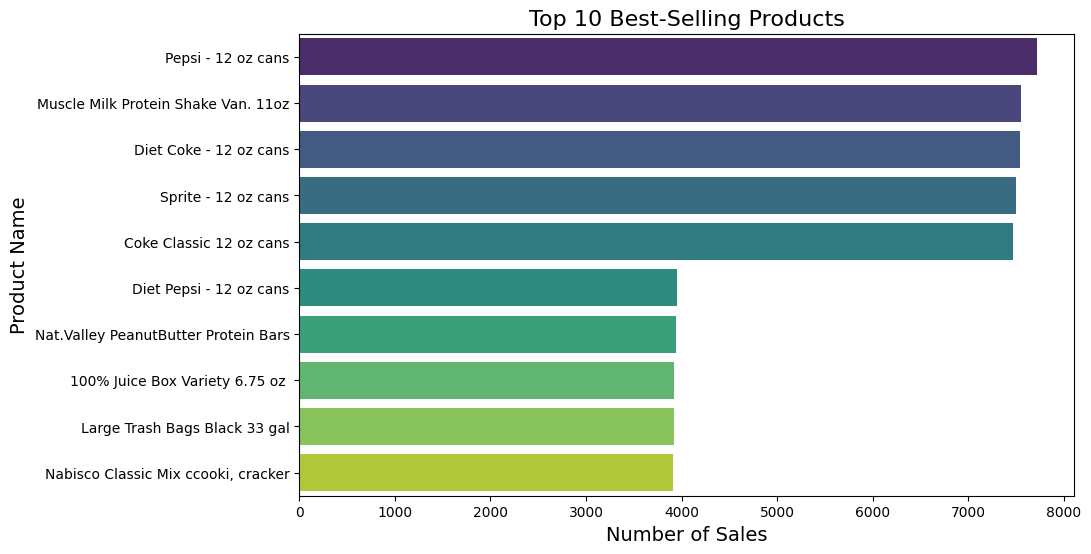

In [ ]:
# 2. Bar Plot: أفضل المنتجات مبيعًا
if 'item_dim.item_name' in df.columns:
    top_items = df['item_dim.item_name'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
    plt.title('Top 10 Best-Selling Products', fontsize=16)
    plt.xlabel('Number of Sales', fontsize=14)
    plt.ylabel('Product Name', fontsize=14)
    plt.show()

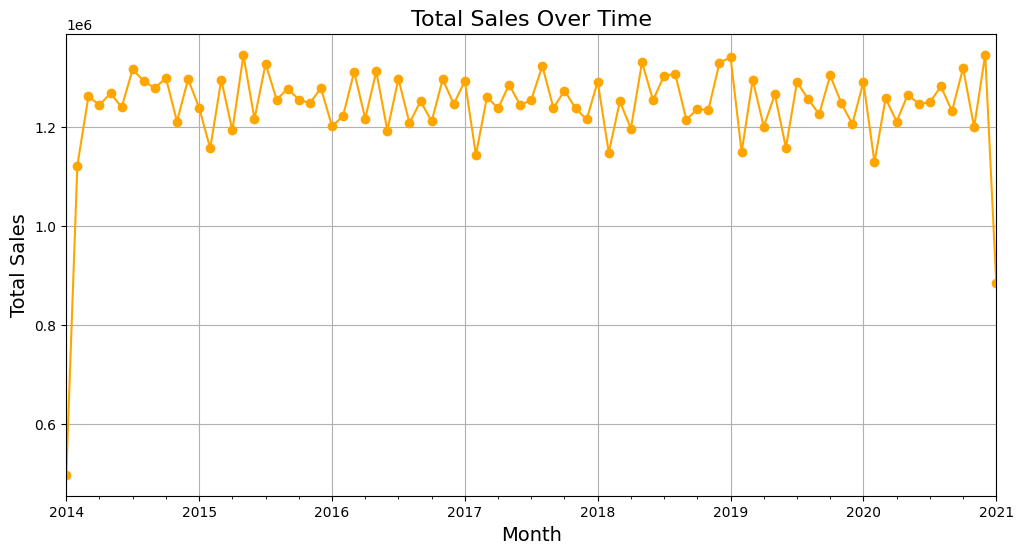

In [ ]:
# 3. Line Plot: تحليل المبيعات بمرور الوقت
if 'time_dim.date' in df.columns and 'total_price' in df.columns:
    sales_by_month = df.groupby(df['time_dim.date'].dt.to_period('M'))['total_price'].sum()
    plt.figure(figsize=(12, 6))
    sales_by_month.plot(kind='line', marker='o', color='orange')
    plt.title('Total Sales Over Time', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Total Sales', fontsize=14)
    plt.grid(True)
    plt.show()

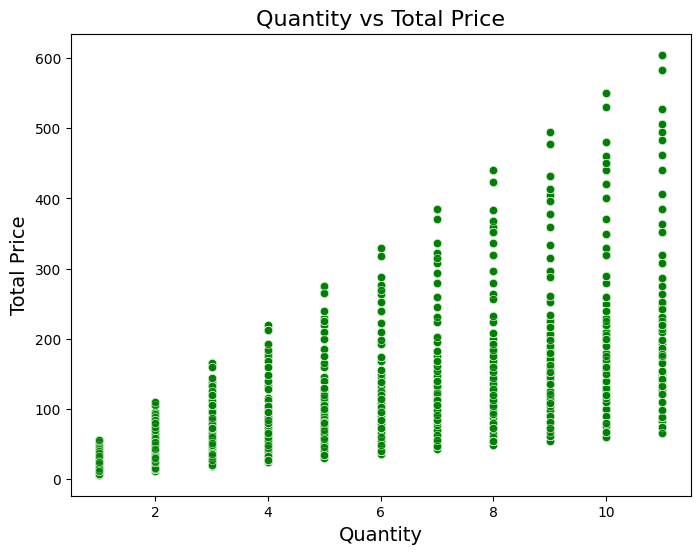

In [ ]:
# 4. Scatter Plot: العلاقة بين الكمية والسعر الإجمالي
if 'quantity' in df.columns and 'total_price' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['quantity'], y=df['total_price'], alpha=0.7, color='green')
    plt.title('Quantity vs Total Price', fontsize=16)
    plt.xlabel('Quantity', fontsize=14)
    plt.ylabel('Total Price', fontsize=14)
    plt.show()

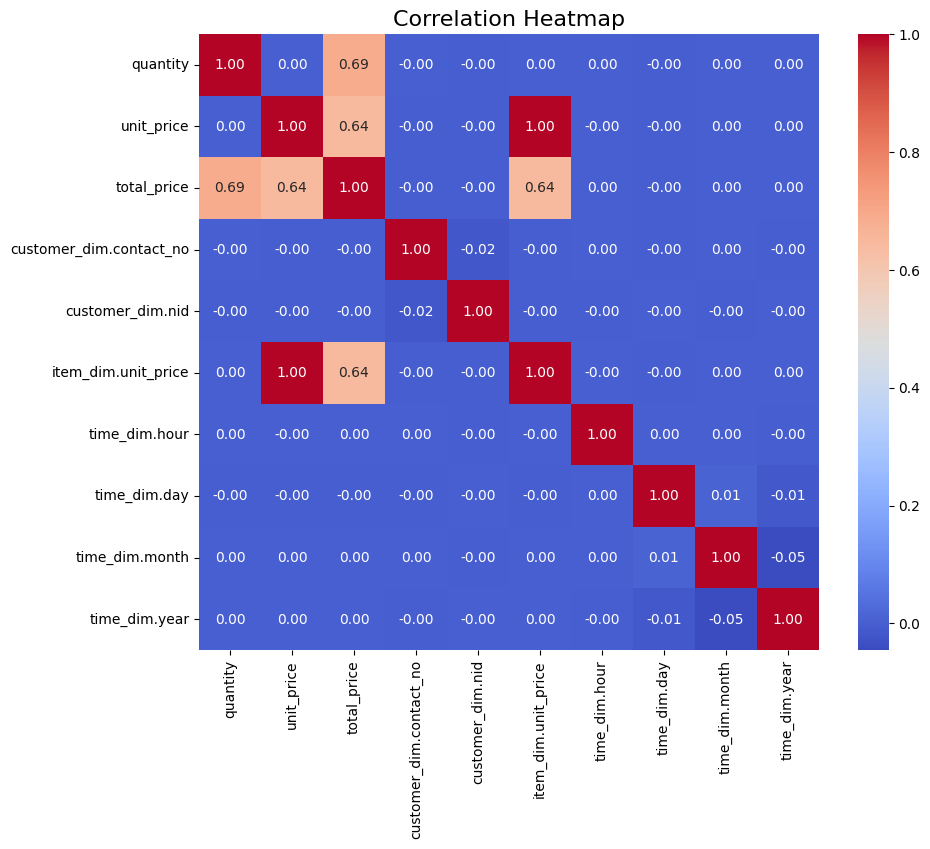

In [ ]:
# 5. Heatmap: خريطة الارتباط بين المتغيرات
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

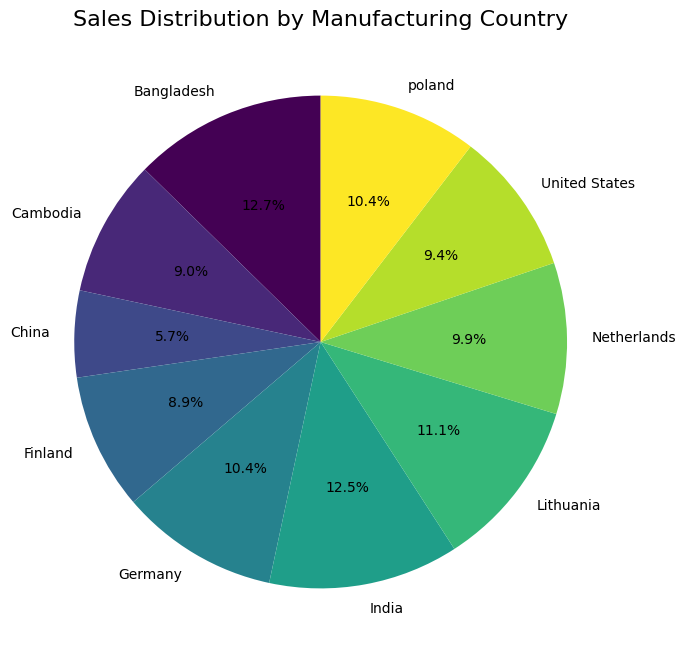

In [ ]:
# 7. Pie Chart: توزيع المبيعات حسب البلد المنتج (manufacturer country)
if 'item_dim.man_country' in df.columns:
    country_sales = df.groupby('item_dim.man_country')['total_price'].sum()
    plt.figure(figsize=(8, 8))
    country_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title('Sales Distribution by Manufacturing Country', fontsize=16)
    plt.ylabel('')  # لإزالة التسمية الجانبية
    plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


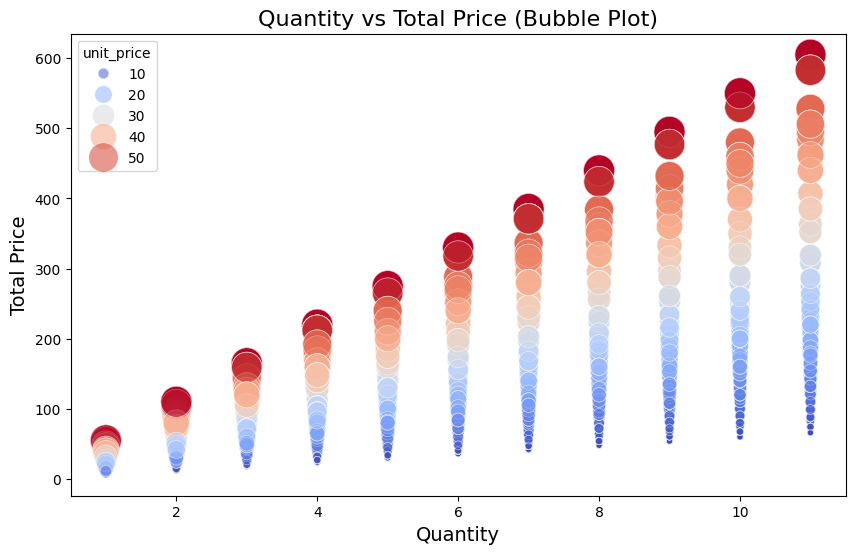

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['quantity'], y=df['total_price'], size=df['unit_price'], hue=df['unit_price'], sizes=(20, 500), palette='coolwarm', alpha=0.6)
plt.title('Quantity vs Total Price (Bubble Plot)', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Total Price', fontsize=14)
plt.show()


<ipython-input-14-8a0ece3b0a20>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='item_dim.supplier', y='unit_price', data=df, palette='pastel')


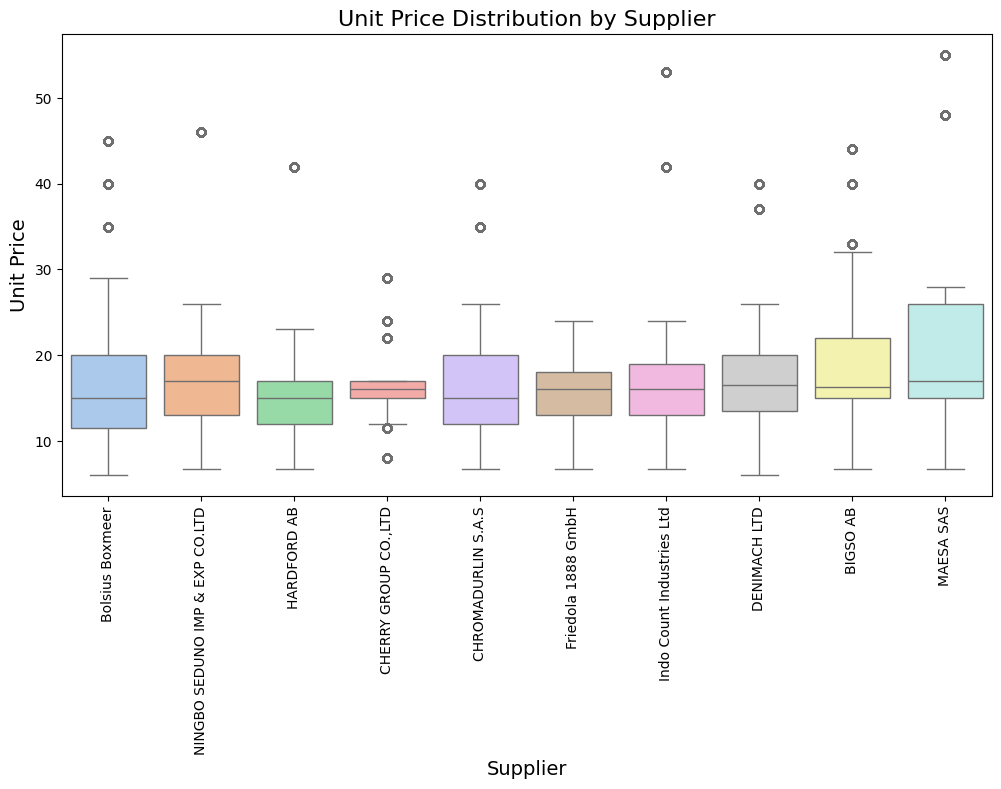

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='item_dim.supplier', y='unit_price', data=df, palette='pastel')
plt.xticks(rotation=90)
plt.title('Unit Price Distribution by Supplier', fontsize=16)
plt.xlabel('Supplier', fontsize=14)
plt.ylabel('Unit Price', fontsize=14)
plt.show()


<ipython-input-16-d881f7be91b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette='mako')


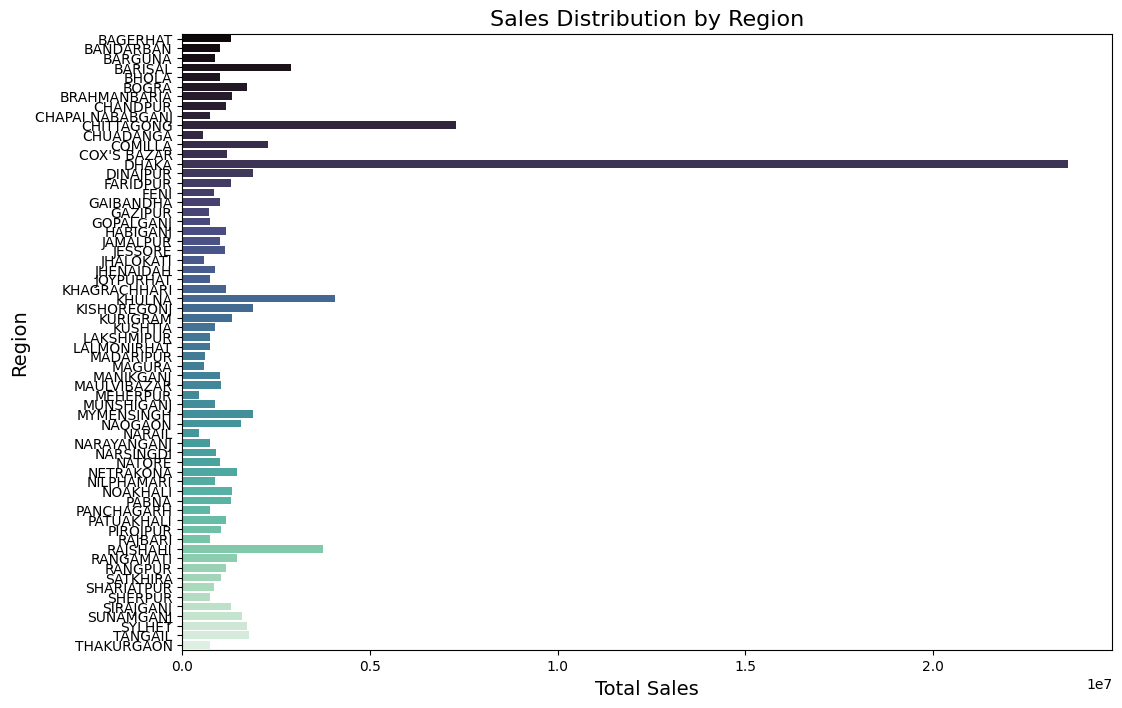

In [ ]:
region_sales = df.groupby('store_dim.Column3')['total_price'].sum()
plt.figure(figsize=(12, 8))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='mako')
plt.title('Sales Distribution by Region', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.show()


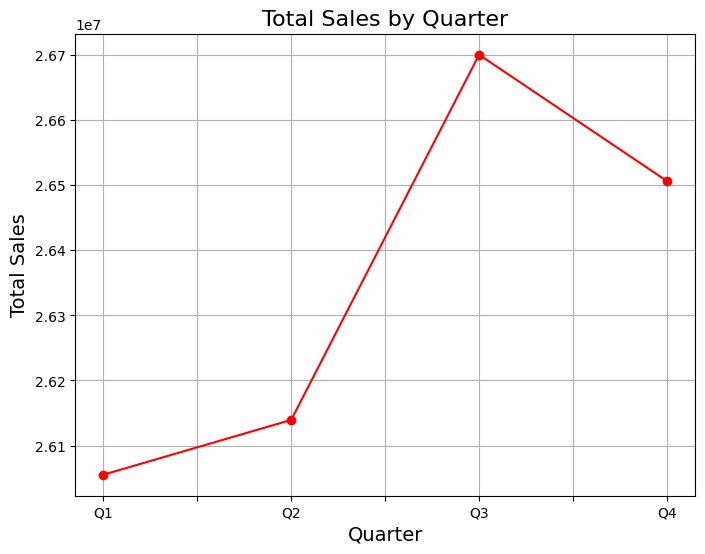

In [ ]:
season_sales = df.groupby('time_dim.quarter')['total_price'].sum()
plt.figure(figsize=(8, 6))
season_sales.plot(kind='line', marker='o', color='red')
plt.title('Total Sales by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True)
plt.show()


<ipython-input-18-3897d685f468>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=supplier_sales.values, y=supplier_sales.index, palette='Greens_d')


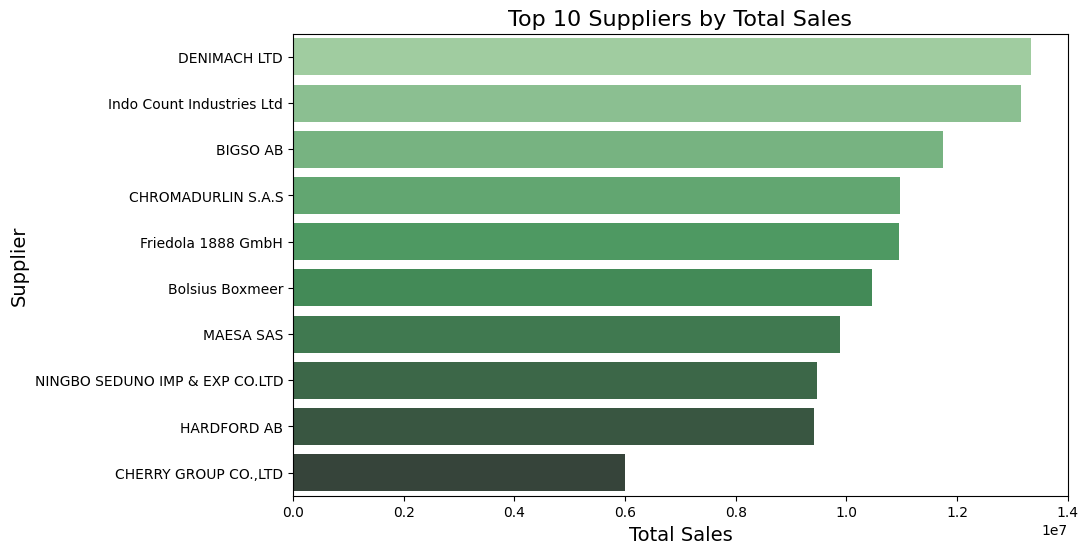

In [ ]:
supplier_sales = df.groupby('item_dim.supplier')['total_price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=supplier_sales.values, y=supplier_sales.index, palette='Greens_d')
plt.title('Top 10 Suppliers by Total Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Supplier', fontsize=14)
plt.show()


<ipython-input-19-710bd367c156>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_dim.hour', y='total_price', data=df, palette='Set2')


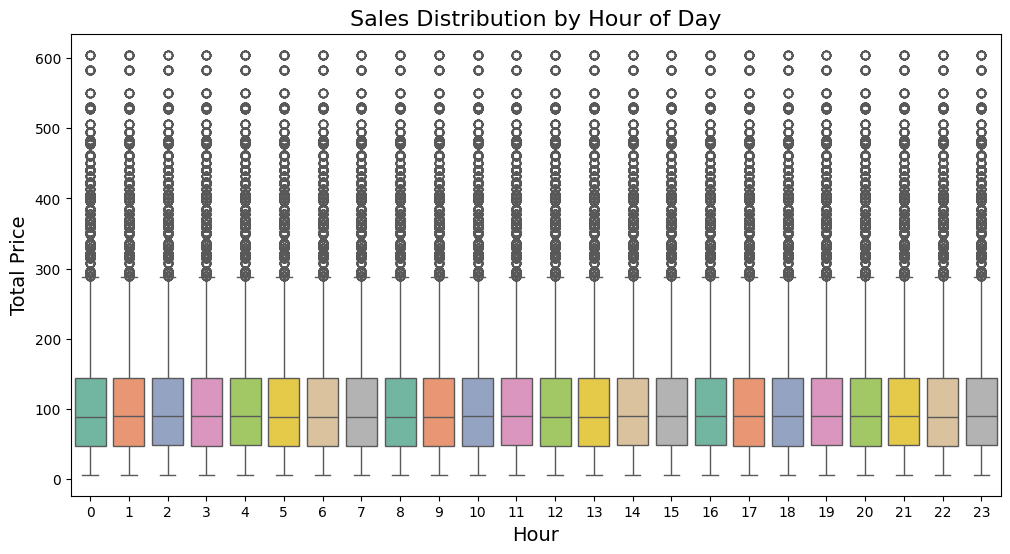

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='time_dim.hour', y='total_price', data=df, palette='Set2')
plt.title('Sales Distribution by Hour of Day', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Price', fontsize=14)
plt.show()


<ipython-input-20-045bb9e4f609>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_sales.values, y=store_sales.index, palette='Blues_d')


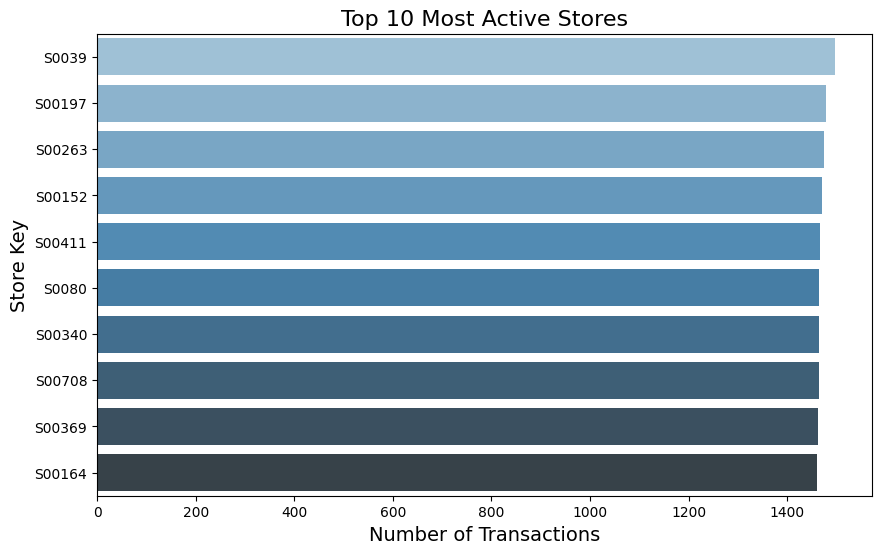

In [ ]:
store_sales = df['store_key'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=store_sales.values, y=store_sales.index, palette='Blues_d')
plt.title('Top 10 Most Active Stores', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Store Key', fontsize=14)
plt.show()


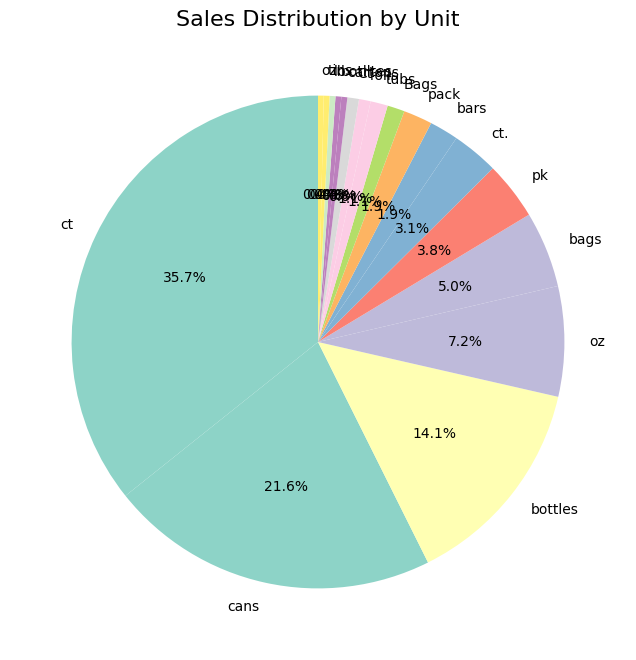

In [ ]:
unit_sales = df['unit'].value_counts()
plt.figure(figsize=(8, 8))
unit_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Sales Distribution by Unit', fontsize=16)
plt.ylabel('')
plt.show()


In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()
print(correlation)

                         quantity  unit_price  total_price  \
quantity                 1.000000    0.001046     0.687928   
unit_price               0.001046    1.000000     0.642851   
total_price              0.687928    0.642851     1.000000   
customer_dim.contact_no -0.000183   -0.000629    -0.000317   
customer_dim.nid        -0.000521   -0.000875    -0.001484   
item_dim.unit_price      0.001046    1.000000     0.642851   
time_dim.hour            0.001699   -0.000133     0.000508   
time_dim.day            -0.000371   -0.000564    -0.000560   
time_dim.month           0.000715    0.001407     0.001940   
time_dim.year            0.001281    0.000074     0.000774   

                         customer_dim.contact_no  customer_dim.nid  \
quantity                               -0.000183         -0.000521   
unit_price                             -0.000629         -0.000875   
total_price                            -0.000317         -0.001484   
customer_dim.contact_no              

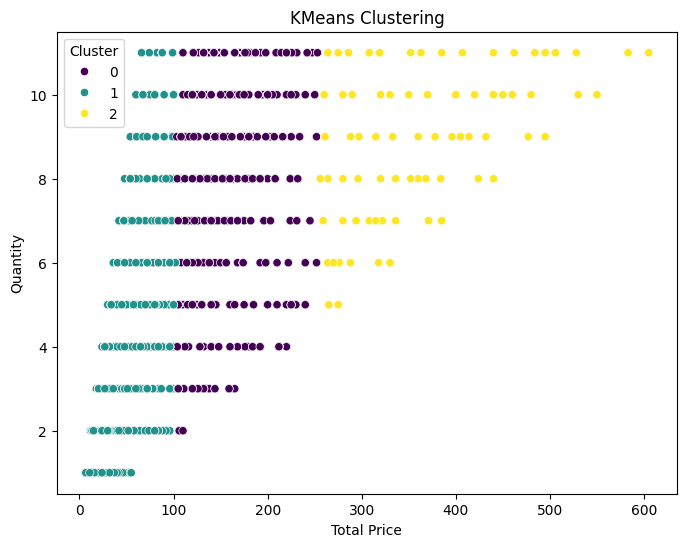

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
# اختيار أعمدة محددة للتجميع (مثل إجمالي الإنفاق والتكرار)
X = df[['total_price', 'quantity']]
kmeans = KMeans(n_clusters=3)  # حدد عدد المجموعات
df['cluster'] = kmeans.fit_predict(X)


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_price', y='quantity', hue='cluster', palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()

